In [45]:
import gzip, json, random, pandas as pd

df = pd.read_csv('../Data/movie_reviews.csv')

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
# df.drop(['NODE'])
df = df[['REVIEWBODY', 'REVIEWRATING_adj']]
df.head()

,REVIEWBODY,REVIEWRATING_adj
0,""" Shot ever so beautifully, Chittagong is a te...",3.0
1,""" This is a film that needs watching, because ...",4.0
2,""" And while Chittagong falls well short of bei...",3.0
3,""" An absolute must watch. ""@en-US",4.0
4,""" What makes Chittagong particularly special i...",4.0


In [41]:
input_file = '../Data/reviews_Movies_and_TV_5.json.gz'

data = []
with gzip.open(input_file) as f:
    for l in f:
        data.append(json.loads(l.strip()))

data = random.sample(data, 200000)
df = pd.DataFrame.from_dict(data)
target = df['overall']
text = df['reviewText']

In [42]:
ama_df = df[['reviewText', 'overall']]

In [43]:
df.head()
df_1 = ama_df[ama_df['overall']==1.0].values.tolist()
df_2 = ama_df[ama_df['overall']==2.0].values.tolist()
df_3 = ama_df[ama_df['overall']==3.0].values.tolist()
df_4 = ama_df[ama_df['overall']==4.0].values.tolist()
df_5 = ama_df[ama_df['overall']==5.0].values.tolist()
df1 = random.sample(df_1, 1001)
df2 = random.sample(df_2, 1001)
df3 = random.sample(df_3, 1001)
df4 = random.sample(df_4, 1001)
df5 = random.sample(df_5, 1001)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])

In [51]:
df.head()
df_1 = df[df['REVIEWRATING_adj']==1.0].values.tolist()
df_2 = df[df['REVIEWRATING_adj']==2.0].values.tolist()
df_3 = df[df['REVIEWRATING_adj']==3.0].values.tolist()
df_4 = df[df['REVIEWRATING_adj']==4.0].values.tolist()
df_5 = df[df['REVIEWRATING_adj']==5.0].values.tolist()
df1 = random.sample(df_1, 1001)
df2 = random.sample(df_2, 1001)
df3 = random.sample(df_3, 1001)
df4 = random.sample(df_4, 1001)
df5 = random.sample(df_5, 1001)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])

In [20]:
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])

In [52]:
schema = pd.concat([df11, df12, df13, df14, df15])

In [31]:
schema.head()


,reviewText,overall
0,"\n...you cringe at the skin show, you shake yo...",1.0
1,\nWhat is confounding is that the refined film...,1.0
2,I feel that it didn't breakout of its comfort ...,1.0
3,Veteran television director T.J. Scott's made-...,1.0
4,"As you may know, the original ""Cop and a Half""...",1.0


In [44]:
amazon = pd.concat([df11, df12, df13, df14, df15])
amazon.head()


,reviewText,overall
0,this sequel in name only is the low end of hor...,1.0
1,"Ok, so let's showcase your No-Talent Kid in a ...",1.0
2,"First of all, the only reason I started watchi...",1.0
3,Irate gamer is simply a rip-off of the angry v...,1.0
4,Is the runway in the cargo plane scene like 25...,1.0


In [37]:
amazon.describe()

,overall
count,500.00000
mean,3.00000
std,1.41563
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,5.00000


In [53]:
all = pd.concat([schema, amazon])

In [54]:
all.describe()

,overall
count,10000.000000
mean,3.000000
std,1.414284
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [55]:
text = all['reviewText']
target = all['overall']

Training and prediction done
Training target statistics: Counter({3.0: 1807, 4.0: 1803, 5.0: 1802, 2.0: 1795, 1.0: 1793})
Testing target statistics: Counter({1.0: 207, 2.0: 205, 5.0: 198, 4.0: 197, 3.0: 193})
train: 0.9/ test: 0.1
Accuracy:0.375
Precision:0.4012255445578181
F1:0.3493874543829976
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0      131   51   13   10    2
2.0       76   99   12   13    5
3.0       35   65   43   42    8
4.0       29   60   20   77   11
5.0       45   37   10   81   25
Training and prediction done
Training target statistics: Counter({1.0: 1644, 5.0: 1599, 3.0: 1590, 2.0: 1588, 4.0: 1579})
Testing target statistics: Counter({4.0: 421, 2.0: 412, 3.0: 410, 5.0: 401, 1.0: 356})
train: 0.8/ test: 0.2
Accuracy:0.3845
Precision:0.4086895035868606
F1:0.3725955585600139
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0      218   79   31   21    7
2.0      113  186   63   41    9
3.0       66  135   90  105   14
4.0      

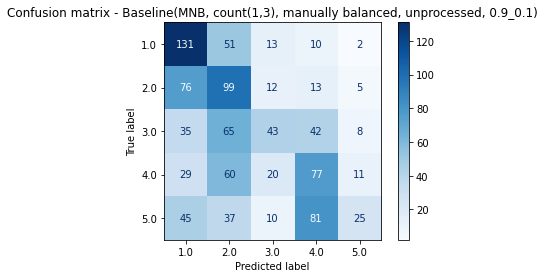

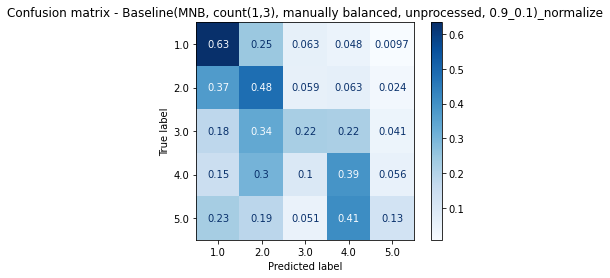

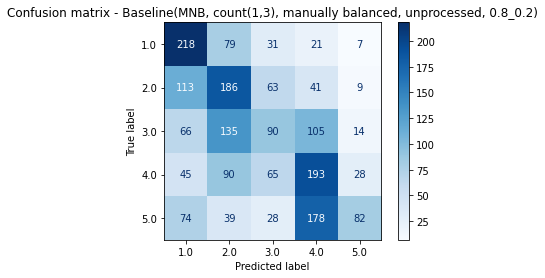

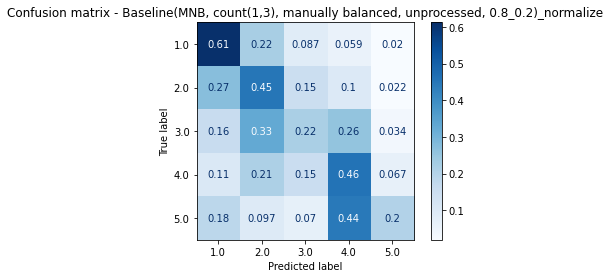

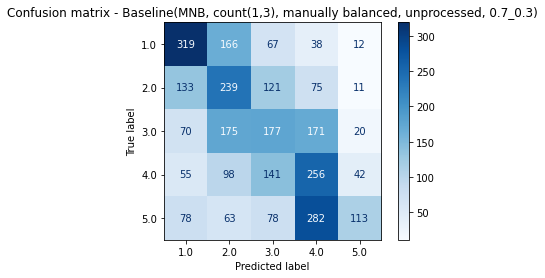

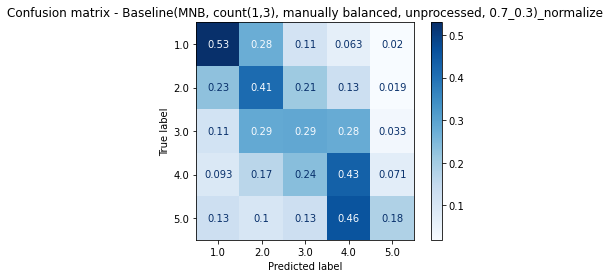

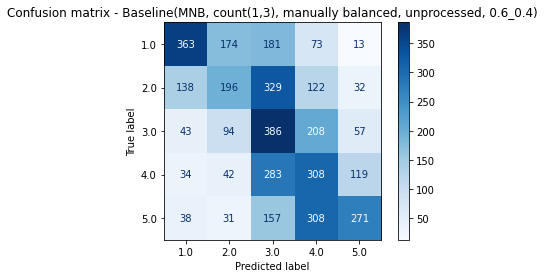

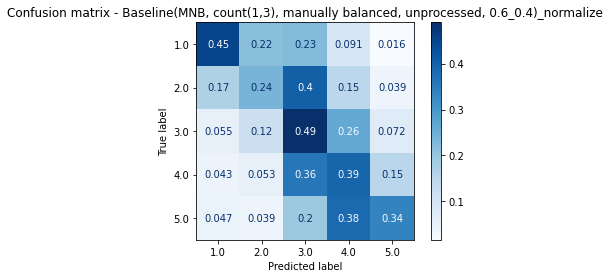

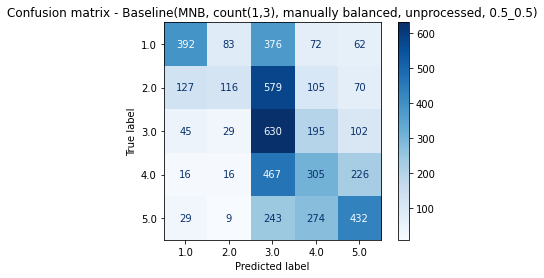

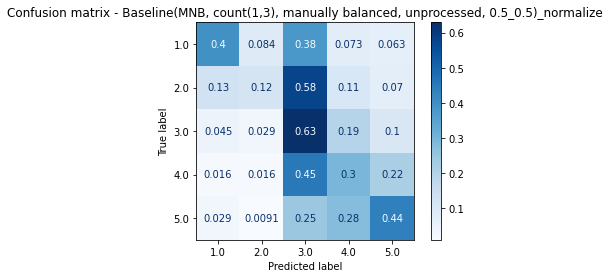

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


cv = CountVectorizer(ngram_range=(1,10))
cv.fit(text)
text_count= cv.transform(text)

nb = MultinomialNB()


list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    # Split dataset into training set and test set
    test_size = i
    train_size = 1 - i
    X_train, X_test, y_train, y_test = train_test_split(text_count, target, test_size=i,random_state=None)

    # Train the model using the training sets
    nb.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = nb.predict(X_test)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: " + str(train_size) + "/ test: " + str(test_size))
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix - Baseline(MNB, count(1,3), manually balanced, unprocessed, {train_size}_{test_size})"
    disp = plot_confusion_matrix(nb, X_test, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(nb, X_test, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()